<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(0_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n250.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.401798,57.958842,64.905841,0.100256,178.366738,177.931216,0.435521
1,0.0,1.0,43.006052,28.370048,68.202480,0.509469,150.088048,149.128447,0.959602
2,0.0,2.0,52.071147,38.206212,52.394608,1.357702,154.029669,151.926629,2.103040
3,0.0,3.0,96.558507,79.981600,25.994930,-6.735503,205.799533,211.769717,-5.970184
4,0.0,4.0,41.552209,79.135375,68.426678,1.740991,200.855252,198.970163,1.885090
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.052080,27.453883,87.473108,0.205086,175.184157,174.641414,0.542743
59996,999.0,56.0,80.886971,93.261024,70.827683,-1.719256,253.256422,254.708976,-1.452554
59997,999.0,57.0,64.258822,63.024567,83.431063,1.096682,221.811135,220.253510,1.557625
59998,999.0,58.0,32.126723,26.456932,87.563022,0.208525,156.355203,155.785199,0.570004


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.401798,57.958842,64.905841,0.100256,178.366738,177.931216,0.435521
1,0.0,1.0,43.006052,28.370048,68.202480,0.509469,150.088048,149.128447,0.959602
2,0.0,2.0,52.071147,38.206212,52.394608,1.357702,154.029669,151.926629,2.103040
3,0.0,3.0,96.558507,79.981600,25.994930,-6.735503,205.799533,211.769717,-5.970184
4,0.0,4.0,41.552209,79.135375,68.426678,1.740991,200.855252,198.970163,1.885090
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.052080,27.453883,87.473108,0.205086,175.184157,174.641414,0.542743
59996,999.0,56.0,80.886971,93.261024,70.827683,-1.719256,253.256422,254.708976,-1.452554
59997,999.0,57.0,64.258822,63.024567,83.431063,1.096682,221.811135,220.253510,1.557625
59998,999.0,58.0,32.126723,26.456932,87.563022,0.208525,156.355203,155.785199,0.570004


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    45.401798  57.958842  64.905841  0.100256  178.366738   
      1.0    43.006052  28.370048  68.202480  0.509469  150.088048   
      2.0    52.071147  38.206212  52.394608  1.357702  154.029669   
      3.0    96.558507  79.981600  25.994930 -6.735503  205.799533   
      4.0    41.552209  79.135375  68.426678  1.740991  200.855252   
...                ...        ...        ...       ...         ...   
999.0 55.0   50.052080  27.453883  87.473108  0.205086  175.184157   
      56.0   80.886971  93.261024  70.827683 -1.719256  253.256422   
      57.0   64.258822  63.024567  83.431063  1.096682  221.811135   
      58.0   32.126723  26.456932  87.563022  0.208525  156.355203   
      59.0   61.974268  49.007905  77.466858 -0.952262  197.496770   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    177.931216  0.435521  
      1.0    149.128447  0.959602  
      2.0    151.926629  2.103040  
      3.0    211.769717 -5.970184  
      4.0    198.970163  1.885090  
...                 ...       ...  
999.0 55.0   174.641414  0.542743  
      56.0   254.708976 -1.452554  
      57.0   220.253510  1.557625  
      58.0   155.785199  0.570004  
      59.0   198.282473 -0.785704  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    45.401798  57.958842  64.905841  0.100256  178.366738   
      1.0    43.006052  28.370048  68.202480  0.509469  150.088048   
      2.0    52.071147  38.206212  52.394608  1.357702  154.029669   
      3.0    96.558507  79.981600  25.994930 -6.735503  205.799533   
      4.0    41.552209  79.135375  68.426678  1.740991  200.855252   
...                ...        ...        ...       ...         ...   
999.0 55.0   50.052080  27.453883  87.473108  0.205086  175.184157   
      56.0   80.886971  93.261024  70.827683 -1.719256  253.256422   
      57.0   64.258822  63.024567  83.431063  1.096682  221.811135   
      58.0   32.126723  26.456932  87.563022  0.208525  156.355203   
      59.0   61.974268  49.007905  77.466858 -0.952262  197.496770   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    177.931216  0.435521  
      1.0    149.128447  0.959602  
      2.0    151.926629  2.103040  
      3.0    211.769717 -5.970184  
      4.0    198.970163  1.885090  
...                 ...       ...  
999.0 55.0   174.641414  0.542743  
      56.0   254.708976 -1.452554  
      57.0   220.253510  1.557625  
      58.0   155.785199  0.570004  
      59.0   198.282473 -0.785704  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.401798,57.958842,64.905841,0.100256,178.366738,177.931216,0.435521
1,0.0,1.0,43.006052,28.370048,68.202480,0.509469,150.088048,149.128447,0.959602
2,0.0,2.0,52.071147,38.206212,52.394608,1.357702,154.029669,151.926629,2.103040
3,0.0,3.0,96.558507,79.981600,25.994930,-6.735503,205.799533,211.769717,-5.970184
4,0.0,4.0,41.552209,79.135375,68.426678,1.740991,200.855252,198.970163,1.885090
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.052080,27.453883,87.473108,0.205086,175.184157,174.641414,0.542743
59996,999.0,56.0,80.886971,93.261024,70.827683,-1.719256,253.256422,254.708976,-1.452554
59997,999.0,57.0,64.258822,63.024567,83.431063,1.096682,221.811135,220.253510,1.557625
59998,999.0,58.0,32.126723,26.456932,87.563022,0.208525,156.355203,155.785199,0.570004


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    45.401798  57.958842  64.905841  0.100256  178.366738   
      1.0    43.006052  28.370048  68.202480  0.509469  150.088048   
      2.0    52.071147  38.206212  52.394608  1.357702  154.029669   
      3.0    96.558507  79.981600  25.994930 -6.735503  205.799533   
      4.0    41.552209  79.135375  68.426678  1.740991  200.855252   
...                ...        ...        ...       ...         ...   
999.0 55.0   50.052080  27.453883  87.473108  0.205086  175.184157   
      56.0   80.886971  93.261024  70.827683 -1.719256  253.256422   
      57.0   64.258822  63.024567  83.431063  1.096682  221.811135   
      58.0   32.126723  26.456932  87.563022  0.208525  156.355203   
      59.0   61.974268  49.007905  77.466858 -0.952262  197.496770   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    177.931216  0.435521  
      1.0    149.128447  0.959602  
      2.0    151.926629  2.103040  
      3.0    211.769717 -5.970184  
      4.0    198.970163  1.885090  
...                 ...       ...  
999.0 55.0   174.641414  0.542743  
      56.0   254.708976 -1.452554  
      57.0   220.253510  1.557625  
      58.0   155.785199  0.570004  
      59.0   198.282473 -0.785704  

[60000 rows x 7 columns]

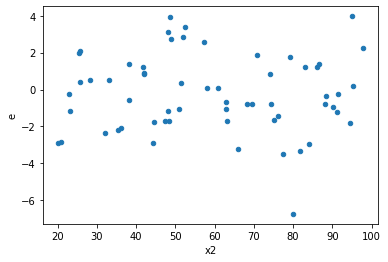

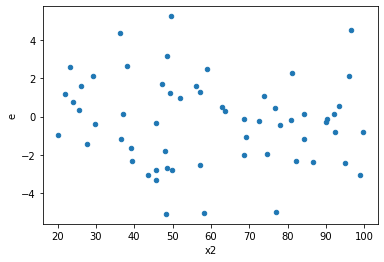

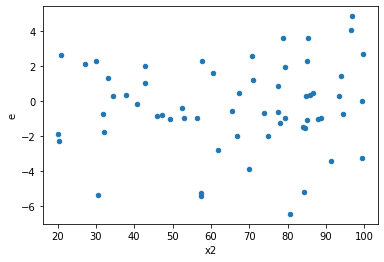

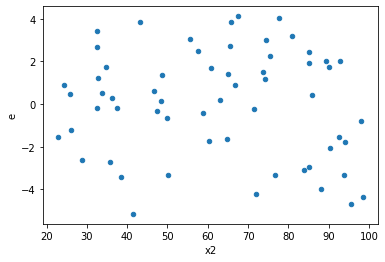

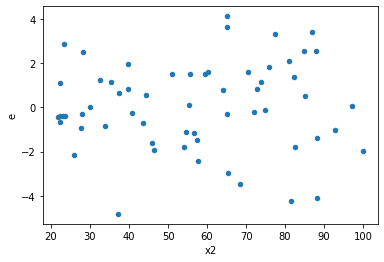

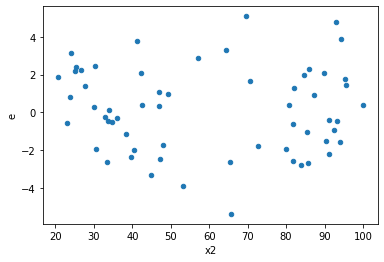

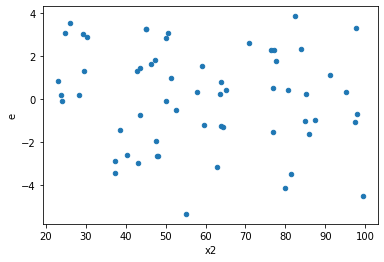

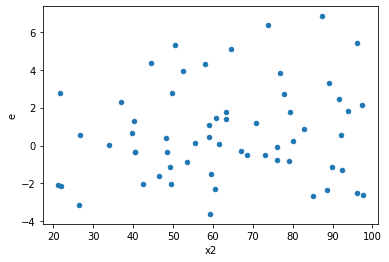

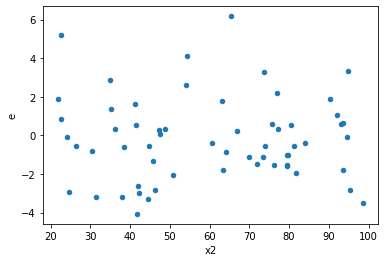

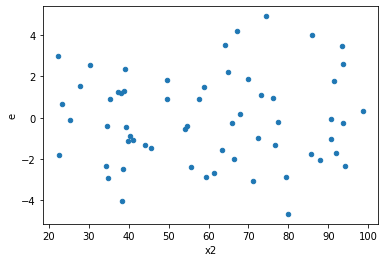

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,72.41017745472676,93.30011095652334,3.448103688320322,4.442862426501112,1.2884944387114319,0.5665388952154575,0.7167305523922712,0.28326944760772876,Reject005=1 : Homoscedasticity
2.0,21.0,21.0,98.4049968907433,123.85494672148764,4.6859522328925385,5.897854605785126,1.258624568211722,0.6028957838336737,0.6985521080831631,0.30144789191683685,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,70.30445357839264,134.67353134001323,3.347831122780602,6.4130253019053916,1.9155761048600735,0.14449413810971712,0.9277529309451414,0.07224706905485856,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,87.42115615320952,94.5675737213368,4.162912197771882,4.503217796254133,1.0817470036154961,0.8588087233599091,0.5705956383200455,0.42940436167995455,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,79.77677597240726,116.05768724781258,3.7988940939241553,5.526556535610123,1.4547803647511897,0.39738272553435916,0.8013086372328204,0.19869136276717958,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,115.11889097798047,145.6051929626079,5.481851951332404,6.933580617267043,1.2648244934053328,0.5951903337082434,0.7024048331458783,0.2975951668541217,Reject005=1 : Homoscedasticity
9.0,21.0,21.0,81.68442022712084,117.51117656885523,3.889734296529564,5.59577031280263,1.4385996282047333,0.41153750908404807,0.794231245457976,0.20576875454202403,Reject005=1 : Homoscedasticity
12.0,21.0,21.0,97.91497831892481,103.28511297090907,4.6626180151868954,4.9183387129004315,1.0548448740344185,0.9037813088770661,0.548109345561467,0.45189065443853305,Reject005=1 : Homoscedasticity
13.0,21.0,21.0,71.73000612594701,168.09749246702194,3.4157145774260482,8.004642498429616,2.3434752280916893,0.0573554152368152,0.9713222923815924,0.0286777076184076,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,72.41017745472676,93.30011095652334,3.448103688320322,4.442862426501112,1.2884944387114319,0.5665388952154575,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,112.6649951478554,109.62388854458725,5.364999768945495,5.220185168789869,0.973007529097417,0.9505987398180689,Reject005=1 : Homoscedasticity
2.0,21.0,21.0,98.4049968907433,123.85494672148764,4.6859522328925385,5.897854605785126,1.258624568211722,0.6028957838336737,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,70.30445357839264,134.67353134001323,3.347831122780602,6.4130253019053916,1.9155761048600735,0.14449413810971712,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,87.42115615320952,94.5675737213368,4.162912197771882,4.503217796254133,1.0817470036154961,0.8588087233599091,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,79.77677597240726,116.05768724781258,3.7988940939241553,5.526556535610123,1.4547803647511897,0.39738272553435916,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,125.21336150551569,58.383429322508356,5.962541024072176,2.7801633010718265,0.4662715593649847,0.08772991522035122,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,115.11889097798047,145.6051929626079,5.481851951332404,6.933580617267043,1.2648244934053328,0.5951903337082434,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,128.3412478255719,89.13204691374618,6.111487991693901,4.244383186368866,0.6944926001879396,0.41038269708419667,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      919
Reject005=0 : Heteroscedasticity     81
Name: Result_test, dtype: int64